<a href="https://colab.research.google.com/github/jmpie1/technical-discussion/blob/main/CostUmFeatSelect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)


from sklearn.pipeline import Pipeline

#this is the classifier used for feature selection
clf_featr_sele = RandomForestClassifier(n_estimators=30, 
                                        random_state=42,
                                        class_weight="balanced") 
rfecv = RFECV(estimator=clf_featr_sele, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')

#you can have different classifier for your final classifier
clf = RandomForestClassifier(n_estimators=10, 
                             random_state=42,
                             class_weight="balanced") 
CV_rfc = GridSearchCV(clf, 
                      param_grid={'max_depth':[2,3]},
                      cv= 5, scoring = 'roc_auc')

pipeline  = Pipeline([('feature_sele',rfecv),
                      ('clf_cv',CV_rfc)])

pipeline.fit(X_train, y_train)


179

In [ ]:
sum(pipeline.predict(X_test)==y_test)/len(y_test)

0.9521276595744681

In [ ]:
sum(rfecv.predict(X_test)==y_test)/len(y_test)

0.973404255319149

In [ ]:
clf.fit(X_train, y_train)
sum(clf.predict(X_test)==y_test)/len(y_test)

0.9308510638297872

Automatically created module for IPython interactive environment
Optimal number of features : 3


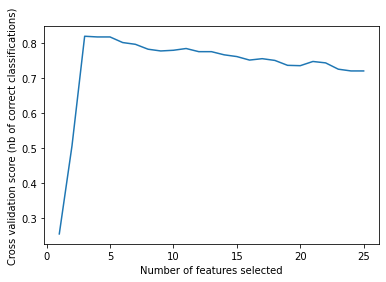

Counter({0: 125, 1: 125, 2: 125, 3: 126, 4: 125, 5: 122, 6: 127, 7: 125})

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import collections

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
collections.Counter(y)